# Code 3
## PSOR && LSOR
## F.T.C.S && F.T.B.S

### Created on February 5th, 2023
#### @Author:MustafA Teymouri 

# ****

## import modules & libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Linspace function

In [2]:
def linspace(start,stop,num):
    x=[]
    dx= (stop-start)/(num-1)
    for i in range(num):
        start+i*dx
        x.append(start+i*dx)
    return x

## STEADY SOLOUTIONS:

## 1) EXPLICIT

## PSOR function

In [3]:
def PSOR(a,b,nx,ny,T1,T2,T3,T4,RES,w):
    dx=a/nx
    dy=b/ny
    B=dx/dy
    x=linspace(0,a,nx)
    y=linspace(0,b,ny)
    T=np.zeros((ny,nx))
    #boundary condition
    T[0,:]=T1
    T[-1,:]=T4
    T[:,0]= T3
    T[:,-1]= T2
    #corners
    T[0,0]=(T1+T3)/2
    T[0,-1]=(T1+T2)/2
    T[-1,0]=(T3+T4)/2
    T[-1,-1]=(T4+T2)/2
    
    TOLD=T.copy()
    res=100
    it=0
    while res>RES:
        it=it+1
        TOLD=w*T+(1-w)*TOLD
        for i in range(1,ny-1):
            for j in range(1,nx-1):
                T[i,j]=(1/(2*(1+B**2)))*(T[i,j+1]+T[i,j-1]+(B**2)*(T[i+1,j]+T[i-1,j]))
            res= sum(sum(abs(T-TOLD)))
    TPLOT=np.flip(T,axis=0)
    plt.contourf(TPLOT)
    plt.colorbar()
    plt.title('Python')
    plt.savefig('contour.png')
    
    print('Iteration:  ',it)
    return print('Temperature Matrix is:  ',T)


In [7]:
PSOR(1,1,40,50,100,200,300,400,0.001,0.8)

Iteration:   2879
Temperature Matrix is:   [[200.         100.         100.         ... 100.         100.
  150.        ]
 [300.         187.98565681 150.41375904 ... 125.55068287 144.16472527
  200.        ]
 [300.         228.32814857 187.05496209 ... 144.21506871 164.50786186
  200.        ]
 ...
 [300.         335.49213395 355.78492293 ... 312.94502951 271.67184722
  200.        ]
 [300.         355.83527263 374.44931295 ... 349.58623675 312.01434108
  200.        ]
 [350.         400.         400.         ... 400.         400.
  300.        ]]


## 2) IMPLICIT

## Coefficient Matrix

In [8]:
def coff(nx,B):
    a=np.zeros((nx,nx))
    for i in range(nx):
        for j in range(nx):
            if i==j:
                a[i,j]=-2*(1+B**2)
            elif abs(i-j)==1 and i!=0 and i!=nx-1:
                a[i,j]=1

    a[0,0]=1
    a[-1,-1]=1
    return a

## LSOR function

In [9]:
def LSOR(a,b,nx,ny,T1,T2,T3,T4,RES,w):
    res=100
    it=0
    dx=a/nx
    dy=b/ny 
    B=dx/dy
    x=linspace(0,a,nx)
    y=linspace(0,b,ny)
    
    #boundary condition 
    uold=np.zeros((ny,nx))
    uold[0,:]=T1
    uold[-1,:]=T4
    uold[:,-1]= T2
    uold[:,0]= T3
    #corners
    uold[0,0]=(T1+T3)/2
    uold[0,-1]=(T1+T2)/2
    uold[-1,0]=(T3+T4)/2
    uold[-1,-1]=(T4+T2)/2
    
    unew= uold.copy()
    A=coff(nx,B)
    
    Told=np.zeros((1,nx))
    Told[0,0]=T3
    Told[0,-1]=T2
 
    while res>RES:
        it+=1
        for i in range(1,ny-1):
            for l in range(1,nx-1):
                Told[0,l]= -1*(B**2)*(uold[i+1,l]+unew[i-1,l])
                
            Tnew=np.dot(np.linalg.inv(A),Told.T)
            
            for k in range(1,nx-1):
                unew[i,k]=Tnew[k,0]
                
        res=sum(sum(abs(uold-unew)))
        uold=w*unew+(1-w)*uold
        
    uplot=np.flip(unew, axis=0)
    plot= plt.contourf(x,y,uplot)
    plt.colorbar()
    plt.title('Python')
    plt.savefig('contour_LSOR.png')
    print('Iteration:  ',it)
    return print('Temperature Matrix is :  ',unew)

Iteration:   2243
Temperature Matrix is :   [[200.         100.         100.         ... 100.         100.
  150.        ]
 [300.         187.9856571  150.41375961 ... 125.55068324 144.16472545
  200.        ]
 [300.         228.32814914 187.05496323 ... 144.21506946 164.50786223
  200.        ]
 ...
 [300.         335.49213457 355.78492416 ... 312.94503039 271.67184766
  200.        ]
 [300.         355.83527294 374.44931356 ... 349.5862372  312.0143413
  200.        ]
 [350.         400.         400.         ... 400.         400.
  300.        ]]


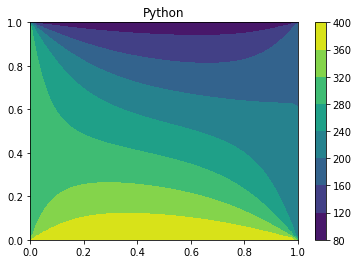

In [12]:
LSOR(1,1,40,50,100,200,300,400,0.001,0.8)